<a href="https://colab.research.google.com/github/RayhanHaqi/OFFBOARD_TELEOP/blob/master/Machine%20Leaning/Script/Training_Model_Script_Banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kalau Mau Pakai Directory di Google Drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Semua Dependencies

In [48]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.models import model_from_json
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

Set Directory Dataset

In [49]:
BASE_DIR = '/content/drive/MyDrive/Dataset/Banana'      # Directory dataset 
TRAINING_DIR    = os.path.join(BASE_DIR, 'Training')
TESTING_DIR     = os.path.join(BASE_DIR, 'Test')
VALIDATION_DIR  = os.path.join(BASE_DIR, 'Validation')

Bikin Image Generator

In [50]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

testing_generator = validation_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

Found 506 images belonging to 3 classes.
Found 146 images belonging to 3 classes.
Found 74 images belonging to 3 classes.


Import Pre-Trained Model

In [51]:
inception_model = InceptionV3(input_shape = (150, 150, 3),    # ukuran input gambar
                                include_top = False,          # hilangkan layer dense
                                weights = 'imagenet')         # pakai data weight langsung dari imagenet

In [52]:
# inception_model.summary()

In [63]:
last_layer = inception_model.get_layer('mixed5')           # coba eksperimen dengan layer yang berbeda
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


Bikin Layer untuk Output Model

In [72]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)      # coba eksperimen dengan banyak layer yang berbeda
x = layers.Dropout(0.7)(x)                        # coba eksperimen dengan nilai dropout yang berbeda
x = layers.Dense(3, activation='softmax')(x)           

model = Model(inception_model.input, x) 

# model.summary()

Compile Model

In [73]:
model.compile(optimizer = tf.keras.optimizers.SGD(),               # coba eksperimen dengan optimizer yang berbeda
              loss = tf.keras.losses.CategoricalCrossentropy(),                         # coba eksperimen dengan loss function yang berbeda
              metrics = ['accuracy'])

Fit Data to Model

In [74]:
history = model.fit(train_generator, epochs=20, steps_per_epoch=15, validation_data = validation_generator, verbose = 1, validation_steps=1)

Epoch 1/20
15/15 [==============================] - 8s 340ms/step - loss: 1.2392 - accuracy: 0.6375 - val_loss: 0.2172 - val_accuracy: 0.9062
Epoch 2/20
15/15 [==============================] - 4s 260ms/step - loss: 0.2654 - accuracy: 0.9008 - val_loss: 0.1723 - val_accuracy: 0.9688
Epoch 3/20
15/15 [==============================] - 4s 265ms/step - loss: 0.1807 - accuracy: 0.9346 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 4/20
15/15 [==============================] - 4s 276ms/step - loss: 0.1383 - accuracy: 0.9515 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 5/20
15/15 [==============================] - 4s 269ms/step - loss: 0.1725 - accuracy: 0.9304 - val_loss: 0.4959 - val_accuracy: 0.8438
Epoch 6/20
15/15 [==============================] - 4s 266ms/step - loss: 0.1350 - accuracy: 0.9388 - val_loss: 0.1624 - val_accuracy: 0.9375
Epoch 7/20
15/15 [==============================] - 4s 263ms/step - loss: 0.1602 - accuracy: 0.9473 - val_loss: 0.3146 - val_accuracy: 0.9062
Epoch 

In [75]:
skill = model.evaluate(testing_generator)

3/3 [==============================] - 0s 57ms/step - loss: 0.1978 - accuracy: 0.9730


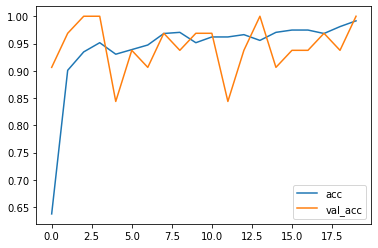

In [76]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

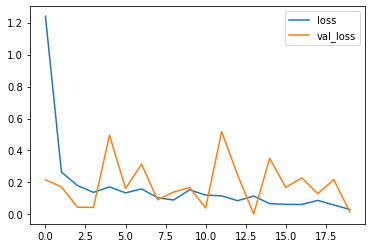

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

Saving images - 2022-06-05T092725.027.jpeg to images - 2022-06-05T092725.027 (6).jpeg
Saving images - 2022-06-05T092725.923.jpeg to images - 2022-06-05T092725.923 (7).jpeg
Saving images - 2022-06-05T092726.070.jpeg to images - 2022-06-05T092726.070 (6).jpeg
Saving images - 2022-06-05T092726.390.jpeg to images - 2022-06-05T092726.390 (6).jpeg
Saving images - 2022-06-05T095349.088.jpeg to images - 2022-06-05T095349.088 (6).jpeg
Saving images - 2022-06-05T095350.193.jpeg to images - 2022-06-05T095350.193 (5).jpeg
Saving images - 2022-06-05T095350.235.jpeg to images - 2022-06-05T095350.235 (5).jpeg
Saving images - 2022-06-05T183312.683.jpeg to images - 2022-06-05T183312.683 (6).jpeg
Saving images - 2022-06-05T183312.785.jpeg to images - 2022-06-05T183312.785 (5).jpeg
Saving images - 2022-06-05T183312.968.jpeg to images - 2022-06-05T183312.968 (5).jpeg
images - 2022-06-05T092725.027.jpeg [[4.8662887e-08 9.9999917e-01 8.3895418e-07]]
images - 2022-06-05T092725.923.jpeg [[9.2846665e-07 9.9998

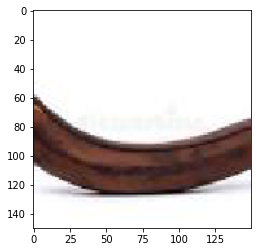

In [84]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
  
uploaded = files.upload()
  
for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x /= 255
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn, classes)

  

Saved Model ke TFLite

In [ ]:
import pathlib

# Export model
EXPORT_DIR = '/content/exportmodel'     # Directory export
tf.saved_model.save(model, EXPORT_DIR)

# Convert model
converter = tf.lite.TFLiteConverter.from_saved_model(EXPORT_DIR)
tflite_model = converter.convert()      

# Save model
tflite_model_file = pathlib.Path('/content/foo.tflite')
tflite_model_file.write_bytes(tflite_model)

Save Model ke TF Serving

In [85]:
import tempfile

MODEL_DIR = '/content/model/Banana'        # Directory model. Apakah harus pakai temp directory?
version = 1
EXPORT_PATH = os.path.join(MODEL_DIR, str(version))   # Path version model
if os.path.isdir(EXPORT_PATH):
  print("\nPath already exist, cleaning up\n")
  !rm -r {EXPORT_PATH}

tf.keras.models.save_model(
    model,
    EXPORT_PATH,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print("\nSaved model:")
!ls -l {EXPORT_PATH}


Path already exist, cleaning up

INFO:tensorflow:Assets written to: /content/model/Banana/1/assets

Saved model:
total 2804
drwxr-xr-x 2 root root    4096 Jun  8 13:31 assets
-rw-r--r-- 1 root root  348989 Jun  8 13:31 keras_metadata.pb
-rw-r--r-- 1 root root 2507411 Jun  8 13:31 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  8 13:31 variables


In [86]:
!zip -r /content/Banana.zip /content/model/Banana

updating: content/model/Banana/ (stored 0%)
updating: content/model/Banana/1/ (stored 0%)
updating: content/model/Banana/1/saved_model.pb (deflated 92%)
updating: content/model/Banana/1/keras_metadata.pb (deflated 95%)
updating: content/model/Banana/1/assets/ (stored 0%)
updating: content/model/Banana/1/variables/ (stored 0%)
updating: content/model/Banana/1/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/model/Banana/1/variables/variables.index (deflated 77%)


In [ ]:
from google.colab import files
files.download('/content/Banana.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
!cp /content/Banana.zip /content/drive/MyDrive/

In [88]:
!saved_model_cli show --dir {EXPORT_PATH} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_4'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 150, 150, 3)
        name: serving_default_input_4:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_13'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 3)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs: TensorS